In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium


In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
import requests

url = "https://corona-virus-world-and-india-data.p.rapidapi.com/api_india"

headers = {
    'x-rapidapi-key': "3dadbc7c58msh37667a52e98f576p19efe9jsnfbd8ec27d80b",
    'x-rapidapi-host': "corona-virus-world-and-india-data.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

:0,"deceased":794,"recovered":59859,"delta":{"confirmed":50,"deceased":2,"recovered":61}}}},"Manipur":{"active":"8443","confirmed":"60311","deaths":"990","deltaconfirmed":"459","deltadeaths":"16","deltarecovered":"499","lastupdatedtime":"14\/06\/2021 19:04:30","migratedother":"0","recovered":"50878","state":"Manipur","statecode":"MN","statenotes":"[Dec 14]:824 out of 980 recovered cases are backdated.","district":{"CAPF Personnel":{"notes":"","active":1284,"confirmed":2967,"migratedother":0,"deceased":2,"recovered":1681,"delta":{"confirmed":7,"deceased":0,"recovered":0}},"Bishnupur":{"notes":"","active":3305,"confirmed":3421,"migratedother":0,"deceased":58,"recovered":58,"delta":{"confirmed":78,"deceased":2,"recovered":0}},"Chandel":{"notes":"","active":724,"confirmed":740,"migratedother":0,"deceased":12,"recovered":4,"delta":{"confirmed":10,"deceased":0,"recovered":0}},"Churachandpur":{"notes":"","active":3874,"confirmed":4004,"migratedother":0,"deceased":72,"recovered":58,"delta":{"c

In [5]:
data = response.json()


In [6]:
df = pd.DataFrame.from_dict(data['state_wise'])


Cleaning The Data

In [7]:
df = df.T

In [8]:
del df['lastupdatedtime']



In [9]:

df.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,migratedother,recovered,state,statecode,statenotes,district
Maharashtra,147354,5917121,112696,8129,1592,14732,3068,5654003,Maharashtra,MH,"[Dec 16]:10,218 duplicate cases & other state ...","{'Ahmednagar': {'notes': '', 'active': 4592, '..."
Karnataka,172141,2771969,33033,6835,120,15409,21,2566774,Karnataka,KA,,"{'Bagalkote': {'notes': '', 'active': 1432, 'c..."
Kerala,113821,2735959,11343,7719,161,16743,427,2610368,Kerala,KL,Mahe native who expired in Kannur included in ...,"{'Other State': {'notes': '', 'active': 0, 'co..."
Tamil Nadu,136884,2366493,29801,12772,254,25561,0,2199808,Tamil Nadu,TN,[July 22]: 444 backdated deceased entries adde...,"{'Railway Quarantine': {'notes': '', 'active':..."
Andhra Pradesh,80013,1814393,11999,4549,59,10114,0,1722381,Andhra Pradesh,AP,,"{'Foreign Evacuees': {'notes': '', 'active': 0..."


In [10]:

    # Confirmed_cases = df.groupby('Date').sum()['confirmed'].reset_index()
    # Recovered_cases = df.groupby('Date').sum()['recovered'].reset_index()
    # Deaths_cases = df.groupby('Date').sum()['deaths'].reset_index()
    # Active_cases = df.groupby('Date').sum()['active'].reset_index()
    

In [11]:
total_confirmed_overall= float(df['confirmed'].sum())
print('The total number of cases till now in India is ',total_confirmed_overall)

The total number of cases till now in India is  5.917121277196927e+210


In [14]:
total_active_overall= float(df['active'].sum())
print('The total number of cases till now in India is ',total_active_overall)


The total number of cases till now in India is  1.473541721411138e+154


In [ ]:
df.style.background_gradient(cmap='Reds')
df.head()

In [13]:

Total_Active_Cases=df.groupby('statecode')['confirmed'].sum().sort_values(ascending=False).to_frame()

In [14]:

Total_Active_Cases

,confirmed
statecode,
CT,986963
RJ,949684
LD,9209
OR,851782
GJ,819866
MP,788183
HR,765861
AN,7261
BR,717215


In [15]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,confirmed
statecode,
CT,986963
RJ,949684
LD,9209
OR,851782
GJ,819866
MP,788183
HR,765861
AN,7261
BR,717215




###### Graphical Represantaion

In [47]:
#Pandas vis
#df.plot(kind='bar',x='statecode',y='confirmed')
#plt.show()
#Plotly
df.iplot(kind='bar',x='statecode',y='confirmed')

AttributeError: 'NoneType' object has no attribute 'sort_values'

<BarContainer object of 37 artists>

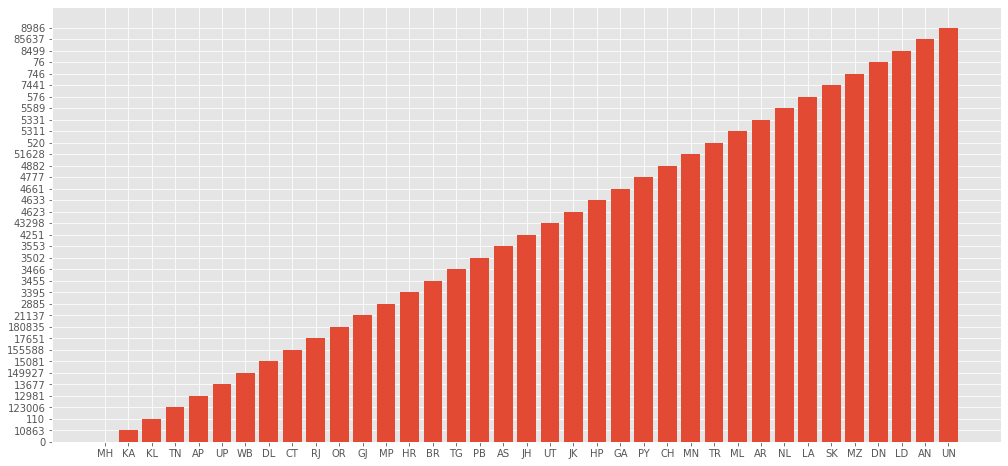

In [17]:
#Matplotlib vis

plt.bar(df['statecode'],df['active'].sort_values(ascending=True)) #statecode

<BarContainer object of 37 artists>

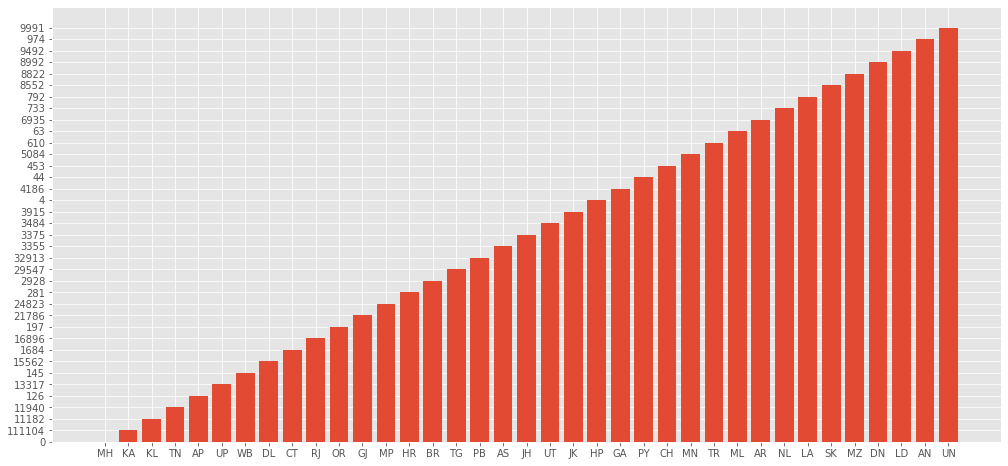

In [18]:
#px.bar(df,x='statecode',y='deaths')
plt.bar(df['statecode'],df['deaths'].sort_values(ascending=True))

<AxesSubplot:xlabel='statecode', ylabel='recovered'>

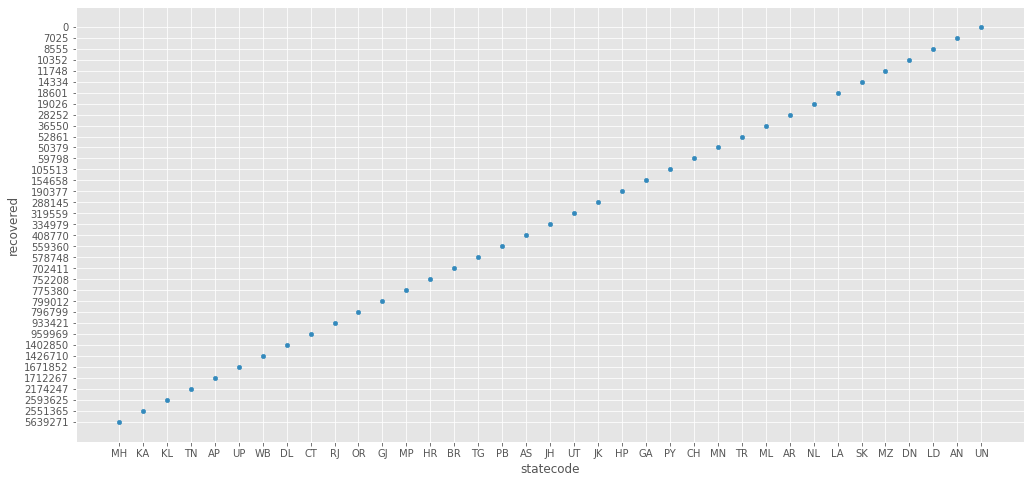

In [19]:

df.plot(kind='scatter',x='statecode',y='recovered')



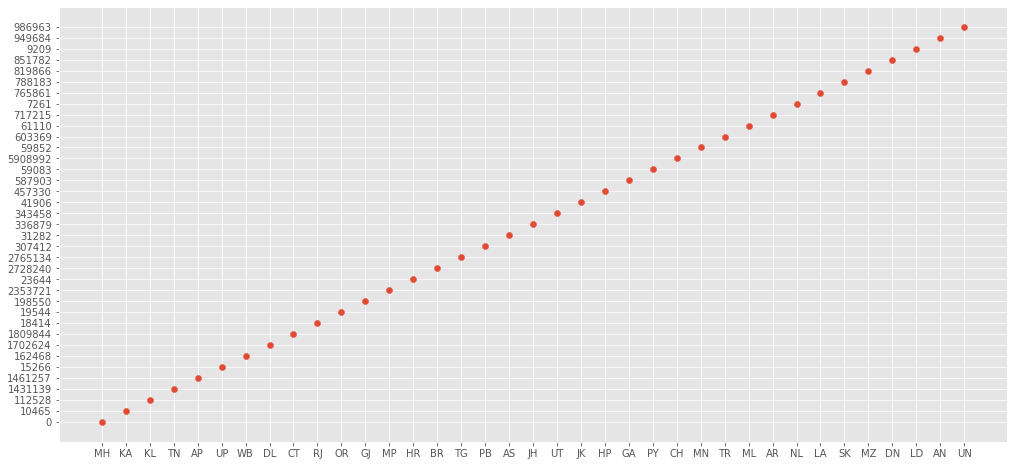

In [20]:
plt.scatter(df['statecode'],df['confirmed'].sort_values(ascending=True))

In [21]:
df.iplot(kind='scatter',x='statecode',y='confirmed')


Migrated People due to covid

In [27]:
df =df.sort_values('confirmed',ascending=True)

In [28]:
#Plotly
df.iplot(kind='bar',x='statecode',y='migratedother')


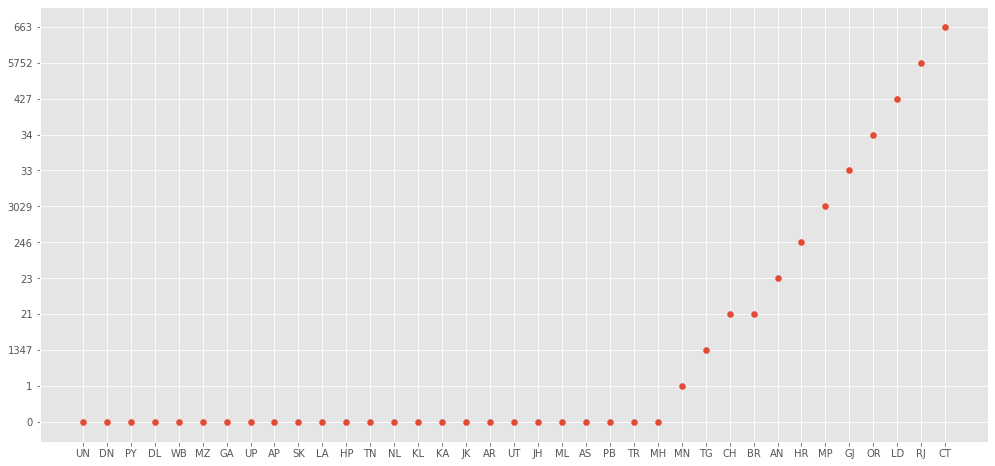

In [29]:
plt.scatter(df['statecode'],df['migratedother'].sort_values(ascending=True))

In [30]:
df.iplot(kind='scatter',x='statecode',y='confirmed',mode='markers+lines',title='My Graph',xTitle='statecode',yTitle='confirmed_cases',colors='red',size=20)

px.scatter(df,x='statecode',y='confirmed')



Object oriented Graphs

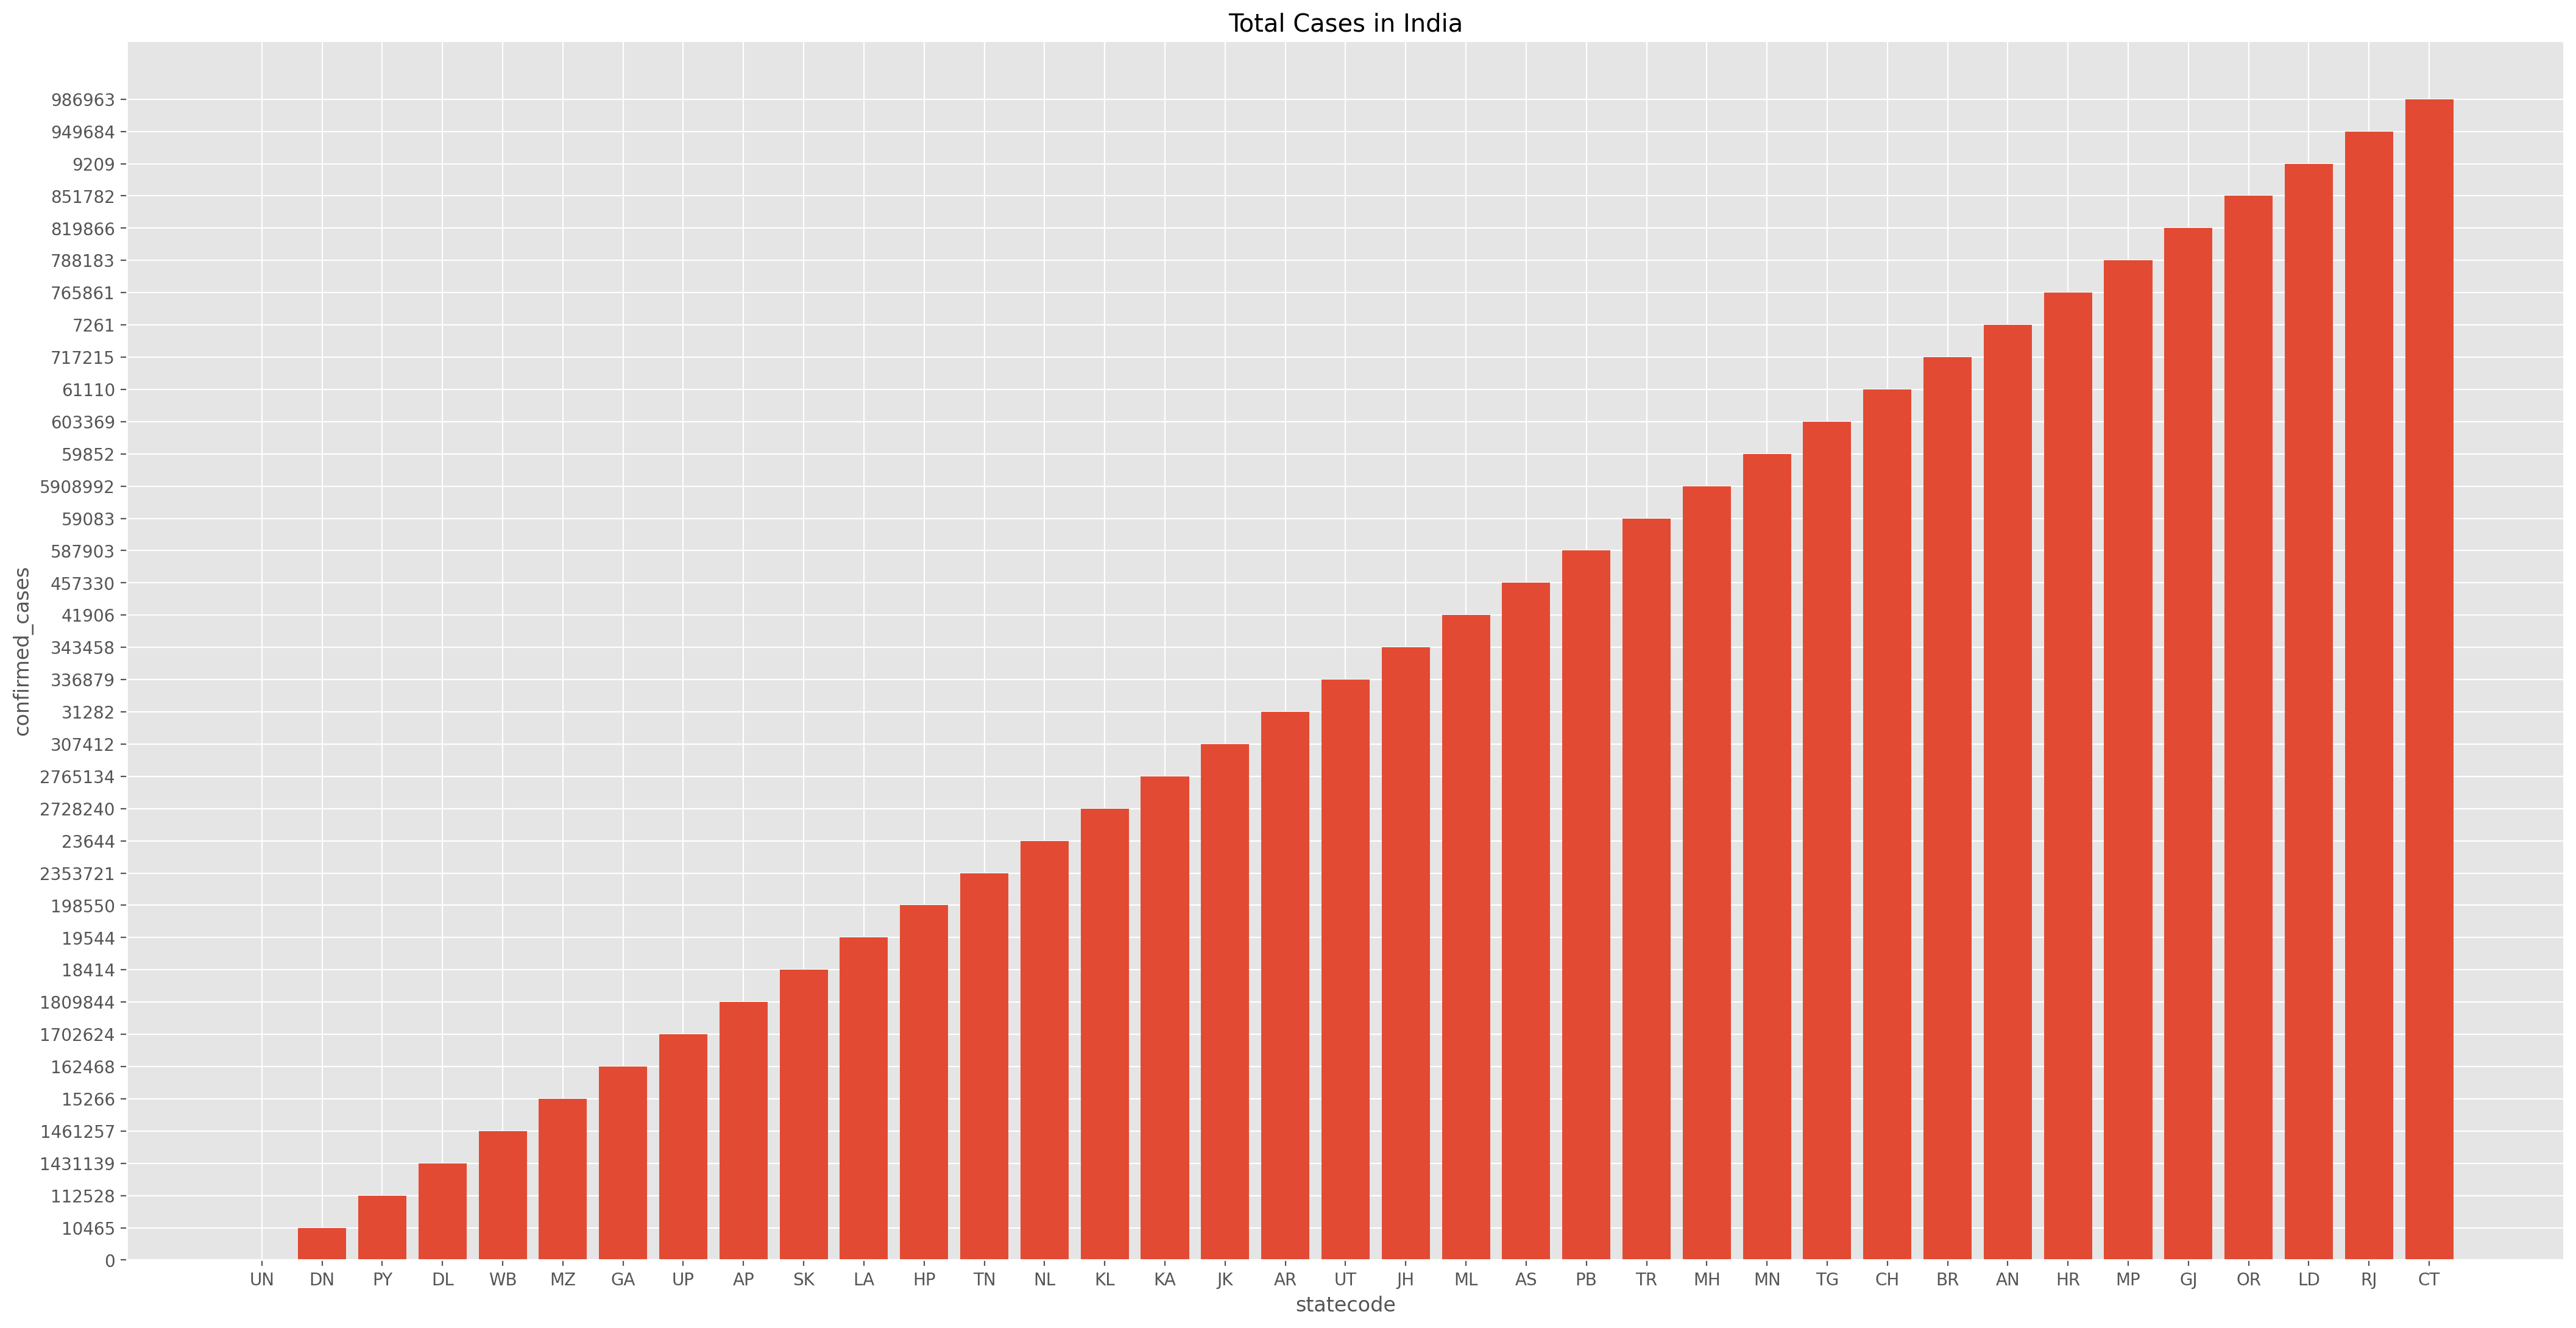

In [31]:

#Matplotlib
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['statecode'],df['confirmed'])
axes.set_title("Total Cases in India")
axes.set_xlabel("statecode")
axes.set_ylabel("confirmed_cases")
plt.show()

#plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['statecode'],y=df['active']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='statecode'),yaxis=dict(title='active_cases'))

In [17]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [48]:
fp = "map_data/Indian_States.shp"
map_df = gpd.read_file(fp)

NameError: name 'gpd' is not defined

In [ ]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)